<a href="https://colab.research.google.com/github/ashishkumargoyal/-ashish_simple_multiple-linear-regression-_concrete-data.i/blob/main/Ashish_Decision_tree_heart_attack_prediction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import some data to play with
df = pd.read_csv('/content/heart_attack_prediction_dataset.csv')

In [3]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df.tail()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0
8762,ZWN9666,25,Female,356,138/67,75,1,1,0,0,...,9.005234,247338,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


In [6]:
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])

In [7]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [70]:
label_encoder = preprocessing.LabelEncoder()
df['Country']= label_encoder.fit_transform(df['Country'])
df['Continent']= label_encoder.fit_transform(df['Continent'])
df['Hemisphere']= label_encoder.fit_transform(df['Hemisphere'])
df['Diet']= label_encoder.fit_transform(df['Diet'])

In [71]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,0,5,1,0,158.0,88.0
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,27.194973,235,1,7,3,4,0,0,165.0,93.0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,28.176571,587,4,4,6,3,0,0,174.0,99.0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,3,4,0,0,163.0,100.0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,16,1,0,0,91.0,88.0


In [13]:
df.shape

(8763, 26)

In [12]:
df['Country'].value_counts()

,count
Country,
7,477
0,471
2,462
17,457
1,449
12,448
6,446
3,440
4,436


In [15]:
country_counts = df['Country'].value_counts()
total_country_count = country_counts.sum()
print(total_country_count)

8763


In [17]:
df['Continent'].value_counts()

,count
Continent,
1,2543
3,2241
5,1362
2,884
0,873
4,860


In [18]:
df['Hemisphere'].value_counts()

,count
Hemisphere,
0,5660
1,3103


In [42]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

In [72]:
# Identify numerical and string columns
num_cols = df.select_dtypes(include='number').columns
str_cols = df.select_dtypes(include='object').columns

In [73]:
print(num_cols)

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic',
       'Diastolic'],
      dtype='object')


In [74]:
print(str_cols)

Index(['Patient ID', 'Blood Pressure'], dtype='object')


In [75]:
#Define feature variables x and y
# Drop the original 'Label' and the encoded label to avoid data leakage
x = df.drop(['Heart Attack Risk','Patient ID','Blood Pressure'], axis=1) # Pass a list of column names to drop
y = df['Heart Attack Risk']

In [76]:
x

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Systolic,Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,261404,31.251233,286,0,6,0,5,1,158.0,88.0
1,21,1,389,98,1,1,1,1,1,1.813242,...,285768,27.194973,235,1,7,3,4,0,165.0,93.0
2,21,0,324,72,1,0,0,0,0,2.078353,...,235282,28.176571,587,4,4,6,3,0,174.0,99.0
3,84,1,383,73,1,1,1,0,1,9.828130,...,125640,36.464704,378,3,4,3,4,0,163.0,100.0
4,66,1,318,93,1,1,1,1,0,5.804299,...,160555,21.809144,231,1,5,16,1,0,91.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,235420,19.655895,67,7,7,16,1,0,94.0,76.0
8759,28,0,120,73,1,0,0,1,0,16.558426,...,217881,23.993866,617,4,9,3,4,0,157.0,102.0
8760,47,1,250,105,0,1,1,1,1,3.148438,...,36998,35.406146,527,4,4,2,5,1,161.0,75.0
8761,36,1,178,60,1,0,1,0,0,3.789950,...,209943,27.294020,114,2,8,2,5,1,119.0,67.0


In [77]:
y

,Heart Attack Risk
0,0
1,0
2,0
3,0
4,0
...,...
8758,0
8759,0
8760,1
8761,0


In [78]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic',
       'Diastolic'],
      dtype='object')

In [79]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [80]:
x_train

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Systolic,Diastolic
7407,50,1,289,64,0,1,1,0,0,15.057529,...,292288,28.749180,229,3,5,12,0,0,143.0,82.0
3028,80,1,313,61,1,0,1,0,0,3.833497,...,297927,35.556930,738,4,10,14,1,0,126.0,83.0
3374,37,1,200,51,1,1,1,0,0,13.136730,...,256342,22.472652,134,6,10,6,3,0,122.0,85.0
1870,88,1,144,57,1,0,1,1,1,19.401920,...,182986,32.016522,273,3,6,5,5,0,95.0,64.0
4322,57,0,217,109,1,0,1,1,1,9.671845,...,255604,33.723563,536,3,8,12,0,0,97.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,58,1,337,49,1,1,1,0,0,9.427398,...,242521,34.443509,751,3,5,1,2,1,166.0,98.0
3603,66,1,382,93,0,1,1,0,1,5.855167,...,197425,31.123782,245,2,4,18,4,0,172.0,73.0
5959,20,1,302,79,1,1,1,0,0,0.651700,...,233116,30.582096,560,1,4,15,3,1,131.0,107.0
5426,18,1,138,57,1,0,1,1,1,17.616592,...,140966,36.426758,379,1,10,8,1,0,177.0,103.0


In [81]:
y_train

,Heart Attack Risk
7407,0
3028,0
3374,1
1870,1
4322,0
...,...
7839,0
3603,0
5959,0
5426,0


In [102]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

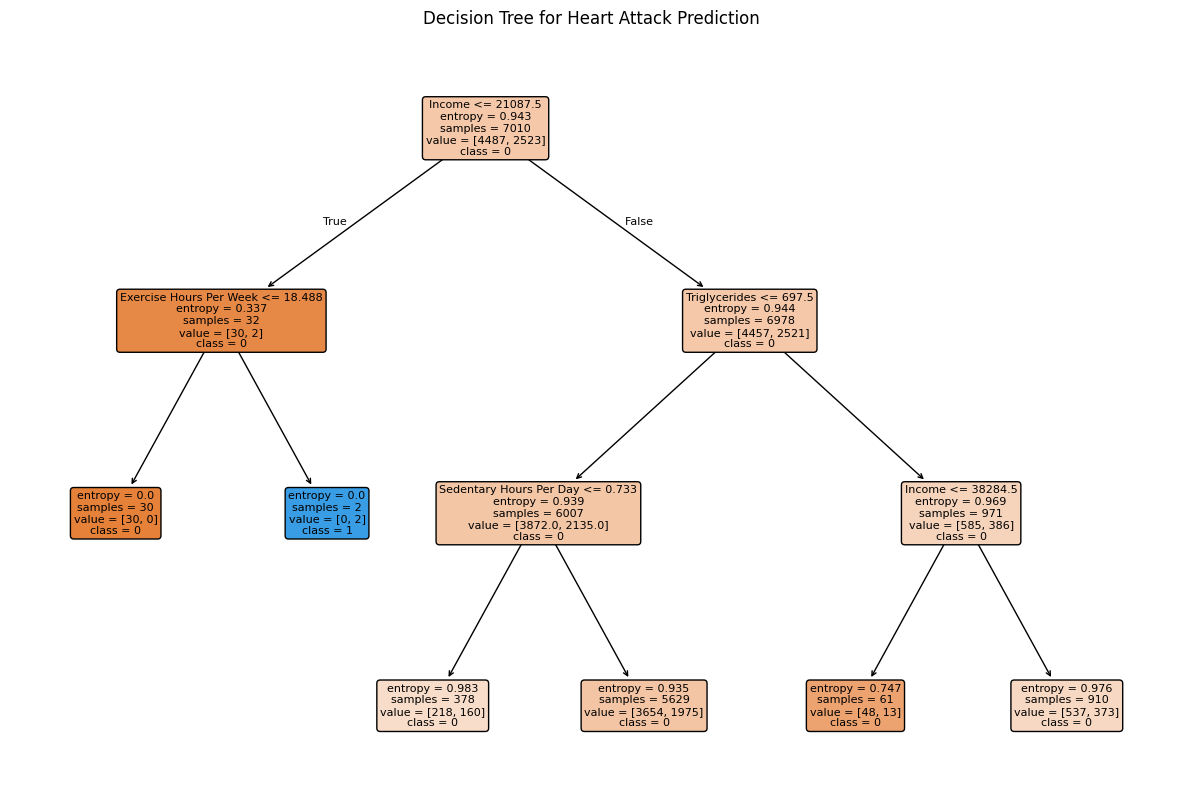

In [103]:
# Assuming 'x' contains your feature data
plt.figure(figsize=(15, 10))
plot_tree(model,
          feature_names=x.columns,
          class_names=['0','1'],
          filled=True, rounded=True,fontsize = 8)
plt.title("Decision Tree for Heart Attack Prediction")
plt.show()